In [1]:
### CLASSIFIER - train model - RESULT -W,L or D 3,1,2

In [2]:
# Todd McCullough
# 2020
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import cpl_main as cpl 
import random
import re

In [3]:
results = pd.read_csv(f'datasets/soccer-nn-train-pred.csv')
results.tail(2)

,game,team,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,r,s,pred
4040,XV340,Chicago,3.33,2.10,4.14,2.49,4.54,1.03,2.63,4.37,2.54,3.04,2.10,4.50,3.11,4.44,1,1,3
4041,XV340,NY Red Bulls,3.56,4.61,4.09,3.87,2.45,3.61,2.50,2.60,1.70,3.76,4.07,4.74,2.17,2.19,3,2,1


In [4]:
s,t = [],[]
for i in range(results.shape[0]):
    if results.loc[i]['pred'] == results.loc[i]['r']:
        t.append(1)
    else:
        s.append(1)
print(round(len(s)/results.shape[0],2),round(len(t)/results.shape[0],2))

0.55 0.45


In [5]:
#results.pop('pred')
results.shape

(4042, 19)

In [6]:
results = results[results['p1'] != 0]

In [7]:
results.shape

(4036, 19)

In [8]:
cols = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9','p10', 'p11', 'p12', 'p13', 'p14']

results['sum'] = round(results[cols].sum(axis=1),2)

results['count'] = (results[results[cols]>0].count(axis=1))-11

results['result'] = round(results['sum'] / (results['count']+0.1),2)

results['test'] = round(results['sum']  / results['sum'].max() - 0.05,3)

results['test2'] = round(results['count']  / results['count'].max() - 0.05,3)

results['diff'] = round(results['s'] * results[cols].max(axis=1)).astype('int64') + 1

results['r'] = results['r'] - 1

results.r.unique()

array([1, 2, 0])

In [9]:
results = results.dropna()

In [10]:
results.head(2)

,game,team,p1,p2,p3,p4,p5,p6,p7,p8,...,p14,r,s,pred,sum,count,result,test,test2,diff
0,I1,Forge FC,3.40,2.48,4.43,2.65,3.43,4.34,3.49,2.34,...,1.72,1,1,2,46.85,3,15.11,0.868,0.95,5
1,I1,York9 FC,4.09,4.06,2.42,2.71,3.46,2.30,3.55,2.83,...,3.45,1,1,2,47.37,3,15.28,0.878,0.95,6


In [11]:
cols2=[]
for col in cols:
    string = re.sub('p','n',col)
    cols2.append(string)
    results[string] = results[col].apply(lambda x: int(x))

In [12]:
results.head(2)

,game,team,p1,p2,p3,p4,p5,p6,p7,p8,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,I1,Forge FC,3.40,2.48,4.43,2.65,3.43,4.34,3.49,2.34,...,3,4,3,2,4,2,3,4,3,1
1,I1,York9 FC,4.09,4.06,2.42,2.71,3.46,2.30,3.55,2.83,...,3,2,3,2,3,1,4,3,4,3


In [13]:
results['sum'] = results['sum'] - results[cols2].sum(axis=1)

In [14]:
results.head(2)

,game,team,p1,p2,p3,p4,p5,p6,p7,p8,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,I1,Forge FC,3.40,2.48,4.43,2.65,3.43,4.34,3.49,2.34,...,3,4,3,2,4,2,3,4,3,1
1,I1,York9 FC,4.09,4.06,2.42,2.71,3.46,2.30,3.55,2.83,...,3,2,3,2,3,1,4,3,4,3


In [15]:
results['f'] = (results[results[cols2]==4].count(axis=1))
results['m'] = (results[results[cols2]==3].count(axis=1))
results['d'] = (results[results[cols2]==2].count(axis=1))
results['g'] = (results[results[cols2]==1].count(axis=1))

In [16]:
results['f'].unique()

array([4, 2, 3, 1, 5, 6, 7, 0])

In [17]:
results[results['m']==10]

,game,team,p1,p2,p3,p4,p5,p6,p7,p8,...,n9,n10,n11,n12,n13,n14,f,m,d,g
259,XX32,Columbus,4.31,3.28,3.33,3.16,3.53,3.15,3.62,3.05,...,3,3,3,2,2,2,1,10,3,0
282,XX44,Columbus,4.31,4.01,3.15,3.49,3.33,3.53,3.28,3.55,...,3,3,3,3,2,2,2,10,2,0
296,XX51,Seattle,4.41,3.42,3.19,3.18,3.11,3.02,3.59,3.31,...,3,3,2,3,2,2,1,10,3,0
335,XX70,FC Cincinnati,3.44,3.50,3.49,3.05,3.50,3.05,3.05,4.41,...,3,2,3,3,2,2,1,10,3,0
646,XIX151,LA Galaxy,3.10,3.20,3.65,3.46,3.31,3.51,3.61,3.77,...,3,2,3,2,2,1,0,10,3,1
651,XIX153,LA Galaxy,3.65,3.15,3.17,3.61,3.20,3.46,3.10,3.77,...,3,2,3,2,2,1,0,10,3,1
1362,XVIII103,Los Angeles FC,3.80,3.69,3.58,3.37,3.50,3.58,3.35,3.00,...,3,3,2,2,2,1,0,10,3,1
1695,XVIII270,Portland,3.37,3.98,3.23,3.86,3.12,3.35,3.27,3.53,...,2,2,3,3,2,1,0,10,3,1
1742,XVIII294,Portland,3.37,3.86,3.23,3.98,3.35,3.27,3.53,3.31,...,3,2,2,3,2,1,0,10,3,1
1792,XVIII319,Real Salt Lake,3.79,3.69,3.76,3.77,3.53,3.52,3.19,3.32,...,3,3,2,2,2,1,0,10,3,1


In [18]:
for i in range(len(cols)):
    results[cols[i]] = results[cols[i]] - results[cols2[i]] 

In [19]:
results.head(2)

,game,team,p1,p2,p3,p4,p5,p6,p7,p8,...,n9,n10,n11,n12,n13,n14,f,m,d,g
0,I1,Forge FC,0.40,0.48,0.43,0.65,0.43,0.34,0.49,0.34,...,4,2,3,4,3,1,4,5,4,1
1,I1,York9 FC,0.09,0.06,0.42,0.71,0.46,0.30,0.55,0.83,...,3,1,4,3,4,3,4,5,4,1


In [20]:
results['plus'] = results['sum'] + results['s']

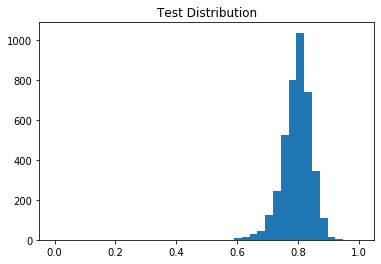

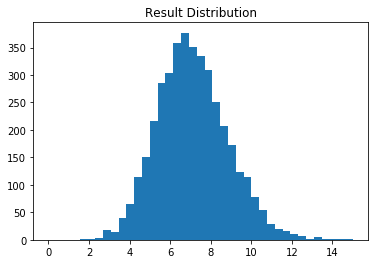

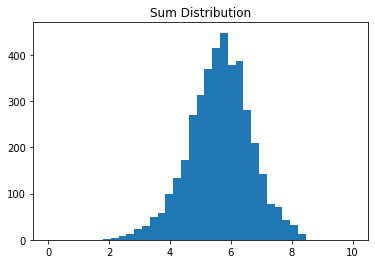

In [21]:
bins_1 = np.linspace(0, 1, 40) # array with 40 evenly spaced numbers between 0 and 200
plt.hist(results['test'], bins_1)
plt.title('Test Distribution')
plt.show()
bins_2 = np.linspace(0, 15, 40) # array with 40 evenly spaced numbers between 0 and 200
plt.hist(results['plus'], bins_2)
plt.title('Result Distribution')
plt.show()
bins_3 = np.linspace(0, 10, 40) # array with 40 evenly spaced numbers between 0 and 200
plt.hist(results['sum'], bins_3)
plt.title('Sum Distribution')
plt.show()

In [22]:
db = results.copy()

In [23]:
db.isnull().values.any()

False

In [24]:
db.head(2)

,game,team,p1,p2,p3,p4,p5,p6,p7,p8,...,n10,n11,n12,n13,n14,f,m,d,g,plus
0,I1,Forge FC,0.40,0.48,0.43,0.65,0.43,0.34,0.49,0.34,...,2,3,4,3,1,4,5,4,1,7.85
1,I1,York9 FC,0.09,0.06,0.42,0.71,0.46,0.30,0.55,0.83,...,1,4,3,4,3,4,5,4,1,8.37


In [25]:
db = db.reset_index()
db.pop('index')

0          0
1          1
2          2
3          3
4          4
        ... 
4031    4037
4032    4038
4033    4039
4034    4040
4035    4041
Name: index, Length: 4036, dtype: int64

In [26]:
s,t = [],[]
for i in range(db.shape[0]):
    if i%2 ==0:
        s.append(db.loc[i].tolist())
    else:
        t.append(db.loc[i].tolist())

new_cols1, new_cols2 = [], []
i = 0
for col in db.columns:
    new_cols1.append(str(i))
    j=i+44
    new_cols2.append(str(j))
    i = i + 1

df = pd.DataFrame(s,columns=new_cols1)
dg = pd.DataFrame(t,columns=new_cols2)

In [27]:
df = df.merge(dg,left_on='0',right_on='44')
df

,0,1,2,3,4,5,6,7,8,9,...,78,79,80,81,82,83,84,85,86,87
0,I1,Forge FC,0.40,0.48,0.43,0.65,0.43,0.34,0.49,0.34,...,1,4,3,4,3,4,5,4,1,8.37
1,I2,Pacific FC,0.49,0.60,0.36,0.09,0.27,0.69,0.51,0.18,...,4,2,2,4,2,2,6,5,1,6.14
2,I3,Pacific FC,0.17,0.49,0.60,0.39,0.27,0.69,0.18,0.55,...,3,2,4,4,1,2,7,4,1,7.45
3,I4,HFX Wanderers FC,0.38,0.48,0.84,0.41,0.36,0.37,0.32,0.42,...,2,3,4,3,1,4,5,4,1,8.22
4,I5,Cavalry FC,0.26,0.83,0.70,0.46,0.45,0.38,0.39,0.53,...,4,3,4,2,3,4,4,5,1,7.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,XV336,Vancouver,0.64,0.43,0.32,0.35,0.59,0.06,0.85,0.22,...,2,4,4,2,1,6,2,5,1,4.53
2013,XV337,Seattle,0.25,0.16,0.55,0.10,0.49,0.81,0.18,0.14,...,2,4,4,3,0,4,4,4,1,5.06
2014,XV338,Sporting KC,0.32,0.58,0.56,0.55,0.63,0.56,0.15,0.22,...,3,4,1,2,4,5,4,4,1,6.69
2015,XV339,FC Dallas,0.31,0.26,0.66,0.04,0.79,0.20,0.28,0.59,...,4,2,3,4,2,4,3,6,1,6.59


In [28]:
db = df

In [29]:
db.pop('0') # popping game and team columns
db.pop('1')
db.pop('44') # popping game and team columns
db.pop('45')
db.pop('60') # popping the result of away team
y = db.pop('16') # popping home team result as the label
X = db

In [30]:
X.head(2)

,2,3,4,5,6,7,8,9,10,11,...,78,79,80,81,82,83,84,85,86,87
0,0.40,0.48,0.43,0.65,0.43,0.34,0.49,0.34,0.22,0.71,...,1,4,3,4,3,4,5,4,1,8.37
1,0.49,0.60,0.36,0.09,0.27,0.69,0.51,0.18,0.55,0.42,...,4,2,2,4,2,2,6,5,1,6.14


In [31]:
X.columns

Index(['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14',
       '15', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27',
       '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39',
       '40', '41', '42', '43', '46', '47', '48', '49', '50', '51', '52', '53',
       '54', '55', '56', '57', '58', '59', '61', '62', '63', '64', '65', '66',
       '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87'],
      dtype='object')

In [32]:
#importing libraries from sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

# import algorithm modules
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [33]:
RandomForestClassifier()

RandomForestClassifier()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
from sklearn.metrics import precision_recall_fscore_support as score

In [36]:
a=[]

In [37]:
import time
def train_rf(n_est, depth,m_leaf):
    rf = RandomForestClassifier(n_estimators=n_est,
                                max_depth=depth,
                                min_samples_leaf = m_leaf,
                                n_jobs=-1)
    
    start = time.time()
    rf_model = rf.fit(X_train,y_train)
    end = time.time()
    fit_time = round((end - start),3)
    start = time.time()
    y_pred = rf_model.predict(X_test)
    end = time.time()
    pred_time = round((end - start),3)
    
    precision, recall, fscore, support = score(y_test, y_pred,average='macro') # pass the y labels to the score, the predicted, positive label; what we are predicting
    a.append([round((y_pred==y_test).sum() / len(y_pred),3),n_est,depth,m_leaf,fit_time,pred_time,round(precision, 3),round(recall, 3)])
    #print(f'time: {fit_time} pred: {pred_time} EST: {n_est} / depth: {depth} / leafs: {m_leaf}/precision: {round(precision, 3)} / recall: {round(recall, 3)} / accuracy: {round((y_pred==y_test).sum() / len(y_pred),3)}')

In [38]:
for n_est in [2,5,10,15,20,30,40,50,60,70,80,100,150,200]:
    for depth in [2,5,10,15,20,30,50,80,None]:
        for m_leaf in [1,2,5,10,15,20]:
            train_rf(n_est,depth,m_leaf)

/home/todd/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/todd/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/todd/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/todd/anaconda3/lib/python3.7/si

In [39]:
final = pd.DataFrame(a,columns=['score','estimators','depth','min samples','fit time','pred_time','precision','recall'])

In [40]:
final.shape

(756, 8)

y_pred==y_test checks the list to see if this is true, then outputs False or True, sum() will add it up and then we divide by the length

precission - when it does identify spam, it is 100% correct
recall - of the spam that enters the mailbox, only 52% is placed in the spam filter box
accuracy - identifies mail as spam or ham

that missed 48% is not that great

In [43]:
final.sort_values(by=['score','recall','precision'],ascending=False).head(30)

,score,estimators,depth,min samples,fit time,pred_time,precision,recall
727,0.985,200,20.0,2,0.722,0.210,0.987,0.979
319,0.983,30,NaN,2,0.224,0.113,0.987,0.978
120,0.983,10,10.0,1,0.115,0.112,0.985,0.978
517,0.983,70,30.0,2,0.346,0.112,0.989,0.976
402,0.983,50,20.0,1,0.237,0.113,0.987,0.976
582,0.983,80,80.0,1,0.361,0.111,0.987,0.976
673,0.983,150,20.0,2,0.596,0.110,0.987,0.976
343,0.983,40,15.0,2,0.233,0.113,0.985,0.976
469,0.983,60,50.0,2,0.342,0.113,0.985,0.976
511,0.983,70,20.0,2,0.349,0.112,0.985,0.976


In [59]:
#Random Forest Regression
def forestRegression_1(x,y):
    model = RandomForestClassifier(n_estimators = 200,
                                   min_samples_leaf = 2,
                                   max_depth = 20,
                                   n_jobs=-1)
    model.fit(x, y)
    return model

rf_1 = forestRegression_1(X_train, y_train)

In [60]:
#Random Forest Regression
def forestRegression_1(x,y):
    model = RandomForestClassifier(n_estimators = 20,
                                   min_samples_leaf = 1,
                                   max_depth = 30,
                                   n_jobs=-1)
    model.fit(x, y)
    return model

rf_2 = forestRegression_1(X_train, y_train)

In [61]:
def check(a,b):
    if a == b:
        result = '<'
    else:
        result = '-'
    return result

In [62]:
print('Random Forest',round(rf_1.score(X_train, y_train),2))
print('Random Forest',round(rf_2.score(X_train, y_train),2))

Random Forest 1.0
Random Forest 1.0


In [63]:
def print_pred_results(model,result,num):
    print('model : ', result, check(result,y_test.loc[num]))

def predictionTest(num,model1,model2):
    p = X_test.loc[num].tolist()
    result1 = model1.predict([p]).flatten()
    print('\nActual       : ',y_test.loc[num])
    print_pred_results(model1,result1,num)

In [64]:
def cycle_pred_test(result,num):
    score = check(result,y_test.loc[num])
    return score

def model_pred_test(model):
    pred = []
    numbers = X_test.index
    random_nums = random.choices(numbers, k=50)
    for i in random_nums:
        p = X_test.loc[i].tolist()
        result = model.predict([p]).flatten().round()
        prediction = cycle_pred_test(result,i)
        pred.append(prediction)
    dz = pd.DataFrame(pred)
    #df = pd.DataFrame(prob)
    c = str(float(dz.sum().values / 50))
    return c

In [65]:
def cycle_prob_test(num,model):
    p = X_test.loc[num].tolist()
    e = model.predict_proba([p]).flatten()
    return e.tolist()

def cycle_pred_test(num,model):
    p = X_test.loc[num].tolist()
    e = model.predict([p]).flatten()
    print(e[0],y_test.loc[num])
    if e[0] == y_test.loc[num]:
        a = 1
    else:
        a = 0
    return a

def model_pred_test(model):
    pred = []
    prob = []
    numbers = X_test.index
    random_nums = random.choices(numbers, k=50)
    test_num = 1
    for i in random_nums:
        print('test: ',test_num)
        label = cycle_pred_test(i,model)
        pred.append(label) # check to see if the values are correct and score it
        lst = cycle_prob_test(i,model)
        prob.append(lst)
        if label == 1:
            print(label,lst)
        test_num += 1
    dz = pd.DataFrame(pred)
    df = pd.DataFrame(prob)
    c = str(float(dz.sum().values / 50))
    return c
    #print('score :',c)

In [66]:
print(model_pred_test(rf_1))

test:  1
1 1
1 [0.13768253968253968, 0.6915674603174605, 0.17074999999999999]
test:  2
2 2
1 [0.04333333333333333, 0.2303333333333333, 0.7263333333333333]
test:  3
0 1
test:  4
1 1
1 [0.1943452380952381, 0.6950714285714286, 0.11058333333333331]
test:  5
2 2
1 [0.010833333333333332, 0.03916666666666666, 0.9500000000000002]
test:  6
2 2
1 [0.007499999999999999, 0.05958333333333333, 0.9329166666666667]
test:  7
1 1
1 [0.16708333333333333, 0.7053333333333335, 0.12758333333333335]
test:  8
2 1
test:  9
0 0
1 [0.9610416666666666, 0.028749999999999994, 0.010208333333333333]
test:  10
2 2
1 [0.04, 0.127, 0.833]
test:  11
0 0
1 [0.87575, 0.09, 0.034249999999999996]
test:  12
0 0
1 [0.6926190476190477, 0.2407976190476191, 0.06658333333333334]
test:  13
0 0
1 [0.8445833333333332, 0.11566666666666664, 0.03975]
test:  14
2 2
1 [0.008333333333333333, 0.0075, 0.9841666666666667]
test:  15
0 0
1 [0.7290833333333333, 0.20591666666666664, 0.065]
test:  16
2 2
1 [0.030833333333333334, 0.11566666666666667

In [67]:
print(model_pred_test(rf_2))

test:  1
0 0
1 [0.8, 0.2, 0.0]
test:  2
2 2
1 [0.05, 0.35, 0.6]
test:  3
2 2
1 [0.05, 0.35, 0.6]
test:  4
0 0
1 [0.95, 0.05, 0.0]
test:  5
2 2
1 [0.0, 0.0, 1.0]
test:  6
1 1
1 [0.3, 0.5, 0.2]
test:  7
2 2
1 [0.05, 0.2, 0.75]
test:  8
0 0
1 [0.6, 0.25, 0.15]
test:  9
0 0
1 [0.85, 0.15, 0.0]
test:  10
2 2
1 [0.0, 0.05, 0.95]
test:  11
2 2
1 [0.05, 0.15, 0.8]
test:  12
1 1
1 [0.2, 0.65, 0.15]
test:  13
2 2
1 [0.05, 0.1, 0.85]
test:  14
1 1
1 [0.05, 0.85, 0.1]
test:  15
2 2
1 [0.0, 0.05, 0.95]
test:  16
0 0
1 [0.65, 0.2, 0.15]
test:  17
2 2
1 [0.0, 0.0, 1.0]
test:  18
0 0
1 [0.9, 0.1, 0.0]
test:  19
0 0
1 [0.75, 0.1, 0.15]
test:  20
2 2
1 [0.0, 0.0, 1.0]
test:  21
0 0
1 [0.9, 0.1, 0.0]
test:  22
0 0
1 [0.8, 0.15, 0.05]
test:  23
1 1
1 [0.25, 0.6, 0.15]
test:  24
1 1
1 [0.3, 0.5, 0.2]
test:  25
2 2
1 [0.1, 0.2, 0.7]
test:  26
0 0
1 [0.75, 0.15, 0.1]
test:  27
2 2
1 [0.0, 0.2, 0.8]
test:  28
0 0
1 [0.8, 0.15, 0.05]
test:  29
1 1
1 [0.15, 0.75, 0.1]
test:  30
2 2
1 [0.0, 0.1, 0.9]
test:  31
1

In [68]:
test_results = pd.DataFrame(index=range(10),columns=['RF 1','RF 2'])
test_results = test_results.fillna(0.0)

In [69]:
for i in range(10):
    r1_s = model_pred_test(rf_1)
    test_results.at[i,'RF 1'] = r1_s
    r2_s = model_pred_test(rf_2)
    test_results.at[i,'RF 2'] = r2_s

test:  1
0 0
1 [0.4153333333333332, 0.39417857142857143, 0.19048809523809523]
test:  2
2 2
1 [0.02, 0.02416666666666667, 0.9558333333333333]
test:  3
0 0
1 [0.9449999999999998, 0.04625, 0.008749999999999999]
test:  4
2 2
1 [0.03561904761904762, 0.0544642857142857, 0.9099166666666667]
test:  5
2 2
1 [0.0075, 0.004166666666666667, 0.9883333333333333]
test:  6
0 0
1 [0.9116666666666667, 0.07, 0.018333333333333333]
test:  7
2 2
1 [0.0375, 0.14930555555555555, 0.8131944444444443]
test:  8
1 1
1 [0.07541666666666666, 0.7685833333333334, 0.15600000000000003]
test:  9
0 0
1 [0.8351666666666668, 0.1375, 0.027333333333333334]
test:  10
2 2
1 [0.0025, 0.013999999999999999, 0.9834999999999999]
test:  11
1 1
1 [0.37201190476190477, 0.5142380952380953, 0.11374999999999998]
test:  12
1 1
1 [0.12157142857142858, 0.6909285714285716, 0.18750000000000003]
test:  13
2 2
1 [0.046833333333333324, 0.34391666666666665, 0.60925]
test:  14
2 2
1 [0.046375, 0.13833333333333334, 0.8152916666666665]
test:  15
2 2


2 2
1 [0.00875, 0.05583333333333333, 0.9354166666666667]
test:  45
0 0
1 [0.8308333333333333, 0.12266666666666666, 0.04650000000000001]
test:  46
2 2
1 [0.011, 0.1725, 0.8164999999999999]
test:  47
2 2
1 [0.09191666666666666, 0.2529166666666666, 0.6551666666666667]
test:  48
2 2
1 [0.0, 0.0125, 0.9875]
test:  49
1 1
1 [0.2015, 0.6080833333333334, 0.19041666666666665]
test:  50
2 1
test:  1
1 1
1 [0.1, 0.7, 0.2]
test:  2
0 0
1 [0.9, 0.1, 0.0]
test:  3
2 2
1 [0.0, 0.1, 0.9]
test:  4
1 1
1 [0.25, 0.6, 0.15]
test:  5
2 2
1 [0.0, 0.3, 0.7]
test:  6
1 2
test:  7
2 2
1 [0.0, 0.0, 1.0]
test:  8
0 0
1 [0.7, 0.3, 0.0]
test:  9
2 2
1 [0.0, 0.1, 0.9]
test:  10
1 1
1 [0.2, 0.75, 0.05]
test:  11
2 2
1 [0.0, 0.0, 1.0]
test:  12
2 2
1 [0.1, 0.15, 0.75]
test:  13
2 2
1 [0.0, 0.15, 0.85]
test:  14
2 2
1 [0.0, 0.15, 0.85]
test:  15
2 2
1 [0.05, 0.15, 0.8]
test:  16
1 1
1 [0.1, 0.6, 0.3]
test:  17
1 1
1 [0.2, 0.65, 0.15]
test:  18
0 0
1 [0.75, 0.15, 0.1]
test:  19
2 2
1 [0.05, 0.05, 0.9]
test:  20
2 2
1 [

1 1
1 [0.1668333333333333, 0.6061666666666666, 0.22699999999999998]
test:  18
2 2
1 [0.021083333333333332, 0.06108333333333334, 0.9178333333333333]
test:  19
2 2
1 [0.005, 0.03275, 0.9622499999999999]
test:  20
1 1
1 [0.12866666666666668, 0.6883690476190476, 0.18296428571428572]
test:  21
1 1
1 [0.11299999999999999, 0.73225, 0.15475000000000003]
test:  22
2 2
1 [0.023, 0.14395238095238097, 0.833047619047619]
test:  23
1 1
1 [0.12333333333333334, 0.5624166666666667, 0.3142499999999999]
test:  24
2 2
1 [0.012083333333333333, 0.025833333333333333, 0.9620833333333333]
test:  25
1 1
1 [0.25683333333333336, 0.5227023809523809, 0.2204642857142857]
test:  26
0 0
1 [0.9125, 0.08125, 0.00625]
test:  27
2 2
1 [0.014750000000000001, 0.08166666666666667, 0.9035833333333333]
test:  28
2 2
1 [0.03216666666666666, 0.35858333333333325, 0.6092500000000001]
test:  29
2 2
1 [0.02333333333333333, 0.06333333333333334, 0.9133333333333334]
test:  30
1 1
1 [0.29724999999999996, 0.5453333333333333, 0.1574166666

1 1
1 [0.2, 0.65, 0.15]
test:  16
1 1
1 [0.05, 0.85, 0.1]
test:  17
1 1
1 [0.1, 0.7, 0.2]
test:  18
2 2
1 [0.05, 0.1, 0.85]
test:  19
2 2
1 [0.05, 0.05, 0.9]
test:  20
0 0
1 [0.8, 0.2, 0.0]
test:  21
1 1
1 [0.05, 0.9, 0.05]
test:  22
1 1
1 [0.05, 0.85, 0.1]
test:  23
2 2
1 [0.0, 0.15, 0.85]
test:  24
2 2
1 [0.05, 0.05, 0.9]
test:  25
1 1
1 [0.35, 0.45, 0.2]
test:  26
2 2
1 [0.0, 0.0, 1.0]
test:  27
2 2
1 [0.0, 0.1, 0.9]
test:  28
0 0
1 [0.65, 0.3, 0.05]
test:  29
2 2
1 [0.05, 0.15, 0.8]
test:  30
2 2
1 [0.1, 0.15, 0.75]
test:  31
1 1
1 [0.1, 0.65, 0.25]
test:  32
2 2
1 [0.0, 0.0, 1.0]
test:  33
1 1
1 [0.35, 0.5, 0.15]
test:  34
1 1
1 [0.15, 0.8, 0.05]
test:  35
2 2
1 [0.05, 0.05, 0.9]
test:  36
2 2
1 [0.05, 0.15, 0.8]
test:  37
2 2
1 [0.05, 0.1, 0.85]
test:  38
0 0
1 [0.65, 0.3, 0.05]
test:  39
2 2
1 [0.0, 0.25, 0.75]
test:  40
1 1
1 [0.15, 0.6, 0.25]
test:  41
2 2
1 [0.1, 0.1, 0.8]
test:  42
0 0
1 [0.85, 0.15, 0.0]
test:  43
2 2
1 [0.05, 0.05, 0.9]
test:  44
1 1
1 [0.1, 0.7, 0.2]
test

2 2
1 [0.0025, 0.004166666666666667, 0.9933333333333334]
test:  30
2 2
1 [0.013333333333333332, 0.06236904761904762, 0.9242976190476191]
test:  31
2 2
1 [0.008333333333333333, 0.04908333333333333, 0.9425833333333334]
test:  32
2 2
1 [0.010833333333333332, 0.03916666666666666, 0.9500000000000002]
test:  33
2 2
1 [0.01, 0.049666666666666665, 0.9403333333333334]
test:  34
2 2
1 [0.07751190476190477, 0.19733333333333328, 0.7251547619047619]
test:  35
2 2
1 [0.0125, 0.05108333333333334, 0.9364166666666666]
test:  36
2 2
1 [0.04633333333333333, 0.09766666666666665, 0.856]
test:  37
0 0
1 [0.45960119047619036, 0.3950654761904762, 0.14533333333333334]
test:  38
2 2
1 [0.0, 0.005, 0.995]
test:  39
2 2
1 [0.019166666666666665, 0.07691666666666667, 0.9039166666666665]
test:  40
1 1
1 [0.12616666666666668, 0.7099999999999999, 0.16383333333333336]
test:  41
2 2
1 [0.005476190476190476, 0.03470238095238096, 0.9598214285714286]
test:  42
1 1
1 [0.11549999999999999, 0.7369999999999999, 0.1475]
test:  

1 1
1 [0.12091666666666667, 0.6958888888888888, 0.18319444444444444]
test:  5
1 1
1 [0.17542857142857143, 0.671529761904762, 0.15304166666666666]
test:  6
1 1
1 [0.3125833333333334, 0.5739166666666666, 0.11349999999999999]
test:  7
2 2
1 [0.009583333333333333, 0.09491666666666665, 0.8955]
test:  8
2 2
1 [0.043125, 0.17498809523809522, 0.7818869047619049]
test:  9
2 2
1 [0.046833333333333324, 0.34391666666666665, 0.60925]
test:  10
2 2
1 [0.005, 0.030749999999999996, 0.9642499999999999]
test:  11
1 1
1 [0.39351190476190473, 0.46982142857142856, 0.13666666666666666]
test:  12
1 1
1 [0.13768253968253968, 0.6915674603174605, 0.17074999999999999]
test:  13
0 0
1 [0.8058333333333334, 0.14458333333333334, 0.04958333333333333]
test:  14
2 2
1 [0.023583333333333335, 0.1649285714285714, 0.8114880952380953]
test:  15
0 0
1 [0.8364285714285715, 0.1106547619047619, 0.05291666666666667]
test:  16
0 0
1 [0.761309523809524, 0.2024404761904762, 0.03625]
test:  17
0 0
1 [0.93625, 0.03625, 0.0275]
test: 

1 1
1 [0.17333333333333337, 0.6230416666666665, 0.203625]
test:  49
2 2
1 [0.023166666666666665, 0.057249999999999995, 0.9195833333333334]
test:  50
2 2
1 [0.11950000000000001, 0.1564166666666667, 0.7240833333333333]
test:  1
2 2
1 [0.0, 0.0, 1.0]
test:  2
1 1
1 [0.35, 0.5, 0.15]
test:  3
2 2
1 [0.0, 0.15, 0.85]
test:  4
0 0
1 [0.95, 0.05, 0.0]
test:  5
2 2
1 [0.05, 0.35, 0.6]
test:  6
0 0
1 [1.0, 0.0, 0.0]
test:  7
0 0
1 [0.8, 0.2, 0.0]
test:  8
1 1
1 [0.35, 0.55, 0.1]
test:  9
2 2
1 [0.0, 0.15, 0.85]
test:  10
0 0
1 [0.9, 0.1, 0.0]
test:  11
1 1
1 [0.0, 0.75, 0.25]
test:  12
1 1
1 [0.15, 0.75, 0.1]
test:  13
2 2
1 [0.05, 0.05, 0.9]
test:  14
0 0
1 [0.6, 0.4, 0.0]
test:  15
2 2
1 [0.0, 0.0, 1.0]
test:  16
0 0
1 [0.95, 0.05, 0.0]
test:  17
2 2
1 [0.05, 0.0, 0.95]
test:  18
2 2
1 [0.0, 0.1, 0.9]
test:  19
1 1
1 [0.0, 0.9, 0.1]
test:  20
2 2
1 [0.0, 0.0, 1.0]
test:  21
1 1
1 [0.15, 0.75, 0.1]
test:  22
1 1
1 [0.2, 0.6, 0.2]
test:  23
2 2
1 [0.0, 0.1, 0.9]
test:  24
1 1
1 [0.1, 0.8, 0.1]


In [70]:
test_results.describe()

,RF 1,RF 2
count,10.000000,10.000000
mean,0.970000,0.982000
std,0.021602,0.017512
min,0.940000,0.960000
25%,0.960000,0.965000
50%,0.970000,0.980000
75%,0.980000,1.000000
max,1.000000,1.000000


In [73]:
import pickle
filename = 'models/cpl_MATCH_classifier-08-21-rf1-2.sav'
pickle.dump(rf_1, open(filename, 'wb'))

In [74]:
filename = 'models/cpl_MATCH_classifier-08-21-rf2-2.sav'
pickle.dump(rf_2, open(filename, 'wb'))